#### Problem statement: 
Create a classification model to predict the gender (male or 
female) based on different acoustic parameters

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('voice.csv')

In [7]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [8]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [7]:
df.duplicated().sum()

2

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3163    False
3164    False
3165    False
3166    False
3167    False
Length: 3168, dtype: bool

In [9]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [14]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [10]:
r1=df['label'].value_counts()

In [11]:
r1

male      1584
female    1584
Name: label, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

In [25]:
lb = LabelEncoder()
df['label'] = lb.fit_transform(df['label'])

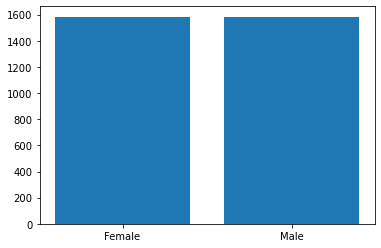

In [52]:
plt.bar(r1.index,r1)
plt.xticks([0,1],['Female','Male'])
plt.show()

#Plotted bar graph because of error in pie chart code
#The error has been attatched at last

In [53]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [56]:
x = df.iloc[:,:-1]
y = df['label']  
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3168, 20)
(3168,)


In [57]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [58]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

## Model Training

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [61]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


### Importing Models

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [67]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [77]:
def mscore(model):
    print('Traning Score',model.score(x_train, y_train))
    print('Testing Score',model.score(x_test, y_test))
    
def gen_matrix(y_test,y_pred):
        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        print(classification_report(y_test,y_pred))
        print('Accuracy Score',accuracy_score(y_test,y_pred))

### Logisitic Regression

In [69]:
m1=LogisticRegression(max_iter=1000)
m1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [70]:
mscore(m1)

Traning Score 0.9068666140489345
Testing Score 0.917981072555205


In [71]:
ypred_m1=m1.predict(x_test)
print(ypred_m1)

[0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1
 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1
 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0
 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1
 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1
 0 0 0 1 1 1 0 0 1 1 0 1 

In [79]:
#Confusion_Matrix
gen_matrix(y_test, ypred_m1)

[[282  38]
 [ 14 300]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       320
           1       0.89      0.96      0.92       314

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634

Accuracy Score 0.917981072555205


In [157]:
#Classification_Report
print(classification_report(y_test,ypred_m1,target_names=tn))

              precision    recall  f1-score   support

        Male       0.95      0.88      0.92       320
      Female       0.89      0.96      0.92       314

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



### Decision Tree Classifier

In [81]:
m2 = DecisionTreeClassifier(criterion='gini',min_samples_split=20, max_depth=10)

In [82]:
m2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=20)

In [83]:
mscore(m2)

Traning Score 0.9853985793212312
Testing Score 0.9558359621451105


In [84]:
ypred_m2=m2.predict(x_test)
print(ypred_m2)

[0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1
 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1
 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0
 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1
 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1
 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1
 0 0 0 1 1 1 0 0 1 1 0 1 

In [85]:
#Confusion_Matrix
gen_matrix(y_test, ypred_m2)

[[312   8]
 [ 20 294]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       320
           1       0.97      0.94      0.95       314

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

Accuracy Score 0.9558359621451105


In [156]:
#CLASSIFICATION REPORT
print(classification_report(y_test,ypred_m2,target_names=tn))

              precision    recall  f1-score   support

        Male       0.94      0.97      0.96       320
      Female       0.97      0.94      0.95       314

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



#### KNN Regression

In [118]:
m3= KNeighborsClassifier(n_neighbors=20)

In [119]:
m3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [120]:
mscore(m3)
# The maximum mscore we get from this mode is 68.
#n_neighbors = 9,15,20 gives the same testing score where-as 10,18 gives 67.

Traning Score 0.7344119968429361
Testing Score 0.6813880126182965


In [121]:
ypred_m3=m3.predict(x_test)

In [122]:
print(ypred_m3)

[0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1
 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0
 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1
 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0
 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 1 0 1 

In [123]:
gen_matrix(y_test,ypred_m3)

[[207 113]
 [ 89 225]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       320
           1       0.67      0.72      0.69       314

    accuracy                           0.68       634
   macro avg       0.68      0.68      0.68       634
weighted avg       0.68      0.68      0.68       634

Accuracy Score 0.6813880126182965


In [155]:
#classification Report
print(classification_report(y_test,ypred_m3,target_names=tn))

              precision    recall  f1-score   support

        Male       0.70      0.65      0.67       320
      Female       0.67      0.72      0.69       314

    accuracy                           0.68       634
   macro avg       0.68      0.68      0.68       634
weighted avg       0.68      0.68      0.68       634



### Support Vector Classifier


In [131]:
m4 = SVC(kernel='linear', C=18)

In [132]:
m4.fit(x_train, y_train)

SVC(C=18, kernel='linear')

In [133]:
mscore(m4)
#C=11,13,18 gives the test_Score = 97.

Traning Score 0.9747434885556433
Testing Score 0.9763406940063092


In [134]:
ypred_m4=m4.predict(x_test)

In [135]:
print(ypred_m4)

[0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1
 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0
 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1
 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1
 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1
 0 0 0 1 1 1 0 0 1 1 0 1 

In [136]:
#Confusion_Matrix
gen_matrix(y_test,ypred_m4)

[[315   5]
 [ 10 304]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       320
           1       0.98      0.97      0.98       314

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Accuracy Score 0.9763406940063092


In [153]:
#Classification Report
print(classification_report(y_test,ypred_m4,target_names=tn))

              precision    recall  f1-score   support

        Male       0.97      0.98      0.98       320
      Female       0.98      0.97      0.98       314

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



### RandomForest Classifier

In [139]:
m5 = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=8,min_samples_split=20)

In [140]:
m5.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=20, n_estimators=150)

In [141]:
mscore(m5)

Traning Score 0.9885556432517758
Testing Score 0.9747634069400631


In [142]:
ypred_m5=m5.predict(x_test)

In [143]:
print(ypred_m5)

[0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1
 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0
 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1
 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1
 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 0 0 1 1 0 1 

In [145]:
#Confusion_Matrix
gen_matrix(y_test, ypred_m5)

[[316   4]
 [ 12 302]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       320
           1       0.99      0.96      0.97       314

    accuracy                           0.97       634
   macro avg       0.98      0.97      0.97       634
weighted avg       0.98      0.97      0.97       634

Accuracy Score 0.9747634069400631


In [149]:
#Classification Report
tn=['Male','Female']
print(classification_report(y_test, ypred_m5, target_names=tn))


              precision    recall  f1-score   support

        Male       0.96      0.99      0.98       320
      Female       0.99      0.96      0.97       314

    accuracy                           0.97       634
   macro avg       0.98      0.97      0.97       634
weighted avg       0.98      0.97      0.97       634



##### REPORT: The Support Vector Machine Classifier gives the best accuracy


Model 4 = ypred_m4 with an Accuracy Score 0.9763406940063092 performed better than other models

##### Error code


 I tried to generate a pie chart, but the following error takes place, so I plotted a pie chart.

ValueError: could not convert string to float: 'male'

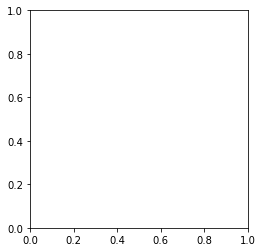

In [18]:
labels = 'Male', 'Female'
sizes = [r1,r1]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels)
ax1.axis('equal')  
plt.show()